Select an option:
1. Upload Image for Coin Counting
2. Upload Image for Rectangle Detection
3. Live Detection of Rectangles (Webcam)
4. Upload Image for Object Detection
5. Upload Image for Dynamic Shape
6. Live Detection of Dynamic Shape
0. Exit
Enter your choice: 1
Total number of coins found: 8
Total value of the coins: RM 2.15
50 sen coins: 3, 20 sen coins: 2, 10 sen coins: 2, 5 sen coins: 1
Select an option:
1. Upload Image for Coin Counting
2. Upload Image for Rectangle Detection
3. Live Detection of Rectangles (Webcam)
4. Upload Image for Object Detection
5. Upload Image for Dynamic Shape
6. Live Detection of Dynamic Shape
0. Exit
Enter your choice: 2
Select an option:
1. Upload Image for Coin Counting
2. Upload Image for Rectangle Detection
3. Live Detection of Rectangles (Webcam)
4. Upload Image for Object Detection
5. Upload Image for Dynamic Shape
6. Live Detection of Dynamic Shape
0. Exit
Enter your choice: 3
Failed to capture frame from webcam
Select an option:
1. Upload I

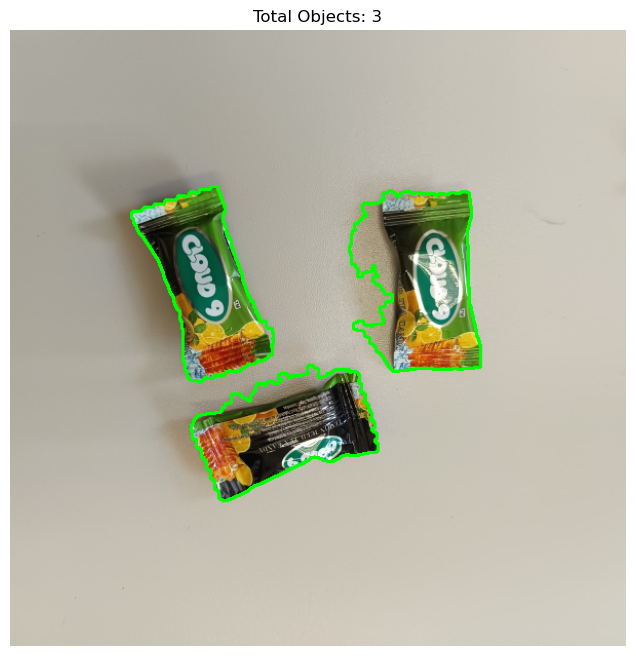

Select an option:
1. Upload Image for Coin Counting
2. Upload Image for Rectangle Detection
3. Live Detection of Rectangles (Webcam)
4. Upload Image for Object Detection
5. Upload Image for Dynamic Shape
6. Live Detection of Dynamic Shape
0. Exit
Enter your choice: 4


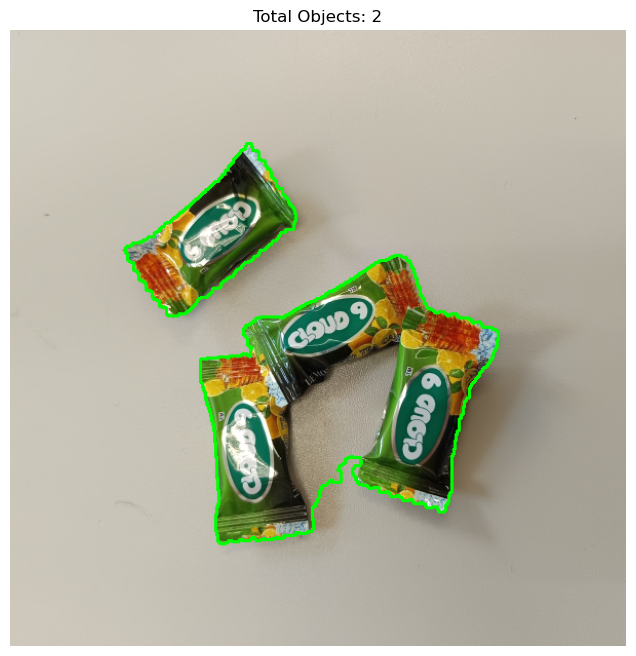

Select an option:
1. Upload Image for Coin Counting
2. Upload Image for Rectangle Detection
3. Live Detection of Rectangles (Webcam)
4. Upload Image for Object Detection
5. Upload Image for Dynamic Shape
6. Live Detection of Dynamic Shape
0. Exit
Enter your choice: 4


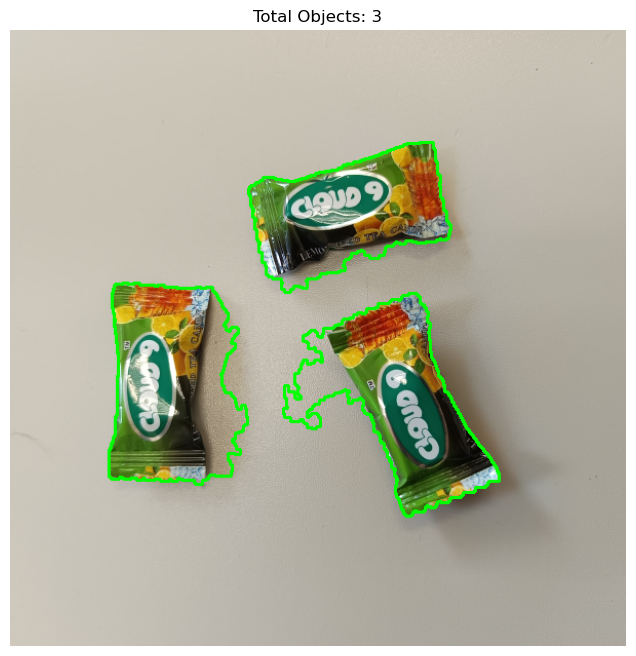

Select an option:
1. Upload Image for Coin Counting
2. Upload Image for Rectangle Detection
3. Live Detection of Rectangles (Webcam)
4. Upload Image for Object Detection
5. Upload Image for Dynamic Shape
6. Live Detection of Dynamic Shape
0. Exit
Enter your choice: 5


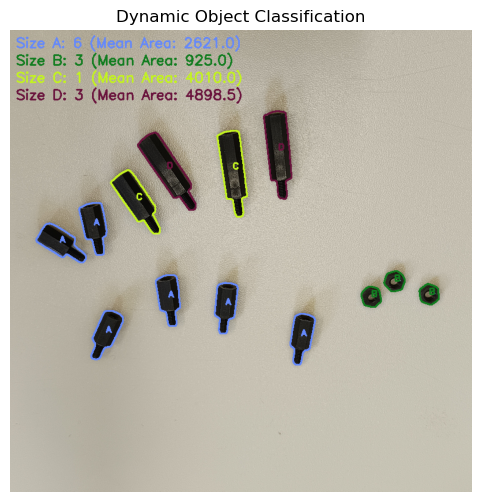

Select an option:
1. Upload Image for Coin Counting
2. Upload Image for Rectangle Detection
3. Live Detection of Rectangles (Webcam)
4. Upload Image for Object Detection
5. Upload Image for Dynamic Shape
6. Live Detection of Dynamic Shape
0. Exit
Enter your choice: 3
Select an option:
1. Upload Image for Coin Counting
2. Upload Image for Rectangle Detection
3. Live Detection of Rectangles (Webcam)
4. Upload Image for Object Detection
5. Upload Image for Dynamic Shape
6. Live Detection of Dynamic Shape
0. Exit
Enter your choice: 1
Total number of coins found: 8
Total value of the coins: RM 2.15
50 sen coins: 3, 20 sen coins: 2, 10 sen coins: 2, 5 sen coins: 1
Select an option:
1. Upload Image for Coin Counting
2. Upload Image for Rectangle Detection
3. Live Detection of Rectangles (Webcam)
4. Upload Image for Object Detection
5. Upload Image for Dynamic Shape
6. Live Detection of Dynamic Shape
0. Exit
Enter your choice: 2
Select an option:
1. Upload Image for Coin Counting
2. Upload Ima

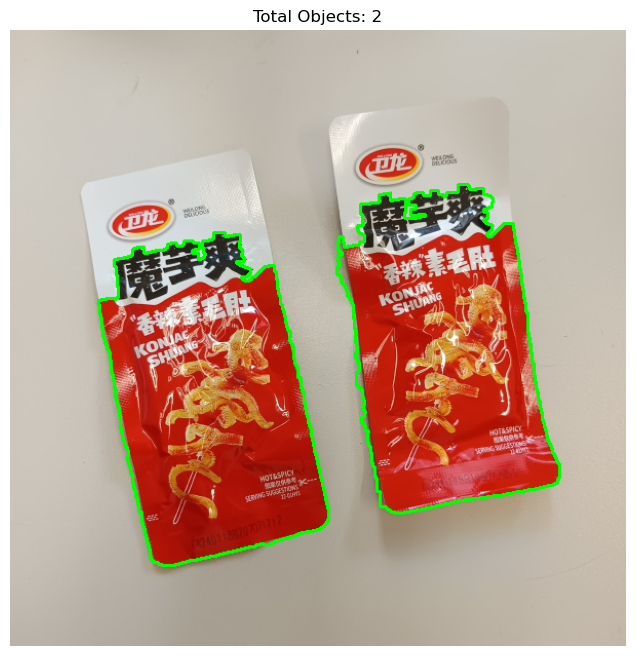

Select an option:
1. Upload Image for Coin Counting
2. Upload Image for Rectangle Detection
3. Live Detection of Rectangles (Webcam)
4. Upload Image for Object Detection
5. Upload Image for Dynamic Shape
6. Live Detection of Dynamic Shape
0. Exit
Enter your choice: 5


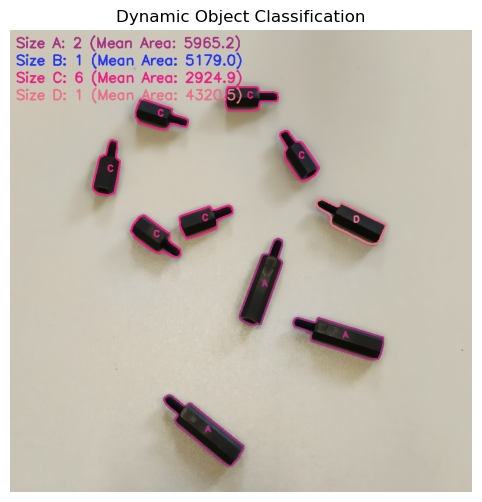

Select an option:
1. Upload Image for Coin Counting
2. Upload Image for Rectangle Detection
3. Live Detection of Rectangles (Webcam)
4. Upload Image for Object Detection
5. Upload Image for Dynamic Shape
6. Live Detection of Dynamic Shape
0. Exit
Enter your choice: 5


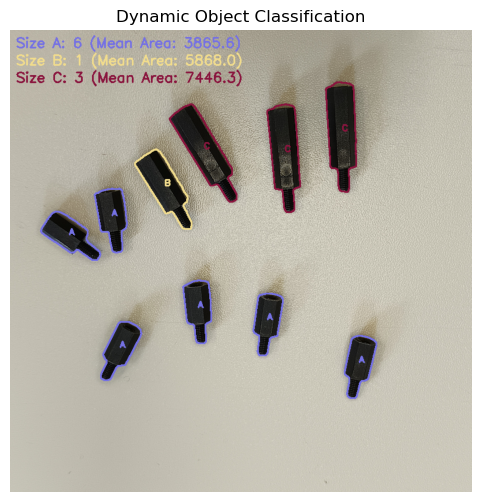

Select an option:
1. Upload Image for Coin Counting
2. Upload Image for Rectangle Detection
3. Live Detection of Rectangles (Webcam)
4. Upload Image for Object Detection
5. Upload Image for Dynamic Shape
6. Live Detection of Dynamic Shape
0. Exit
Enter your choice: 5


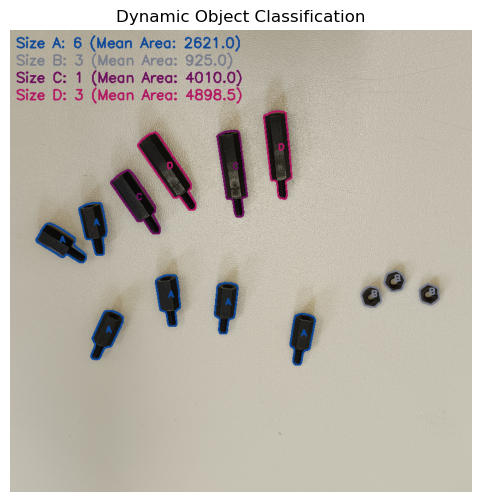

Select an option:
1. Upload Image for Coin Counting
2. Upload Image for Rectangle Detection
3. Live Detection of Rectangles (Webcam)
4. Upload Image for Object Detection
5. Upload Image for Dynamic Shape
6. Live Detection of Dynamic Shape
0. Exit
Enter your choice: 0
Exiting the program.


In [1]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog

# Global variables for the image and minimum area
input_img5 = None
min_area = 1000

# Function to upload and return an image using a file dialog
def upload_image():
    root = tk.Tk()
    root.withdraw()  # Hide the main tkinter window
    file_path = filedialog.askopenfilename(
        title="Select an Image",
        filetypes=[("Image Files", "*.jpg;*.jpeg;*.png;*.bmp;*.tiff")]
    )
    if file_path:
        return cv2.imread(file_path)
    else:
        print("No file selected. Please try again.")
        return None

# Image Upload Rectangle Detection Function
def upload_image_rectangle_detection(image, min_area):
    if image is None:
        print("Failed to load image.")
        return

    # Resize the image if it's too large
    window_width, window_height = 800, 600
    aspect_ratio = image.shape[1] / image.shape[0]

    if image.shape[1] > window_width or image.shape[0] > window_height:
        if aspect_ratio > 1:
            new_width = window_width
            new_height = int(new_width / aspect_ratio)
        else:
            new_height = window_height
            new_width = int(new_height * aspect_ratio)
        resized_img = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)
    else:
        resized_img = image.copy()

    # Convert to grayscale and threshold the image for contour detection
    frame_gray = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
    _, binary_image = cv2.threshold(frame_gray, 100, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Iterate over all contours and find rectangles on the original color image
    rectangle_count = 0
    output_img = resized_img.copy()

    for contour in contours:
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)

        if len(approx) == 4 and cv2.contourArea(contour) > min_area:
            cv2.drawContours(output_img, [approx], 0, (0, 255, 0), 2)
            rectangle_count += 1

    # Display the total count of rectangles on the image
    cv2.putText(output_img, f"Total Rectangles: {rectangle_count}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # Show the image with rectangles
    cv2.imshow('Image with Rectangle Detection', output_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Live Detection of Rectangles Function (Selection 3) - No Trackbar
def live_rectangle_detection():
    # Initialize video capture for webcam
    cap = cv2.VideoCapture(1)  # Set to 0 for the default webcam

    # Loop to continuously get frames from the webcam and process them
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Failed to capture frame from webcam")
            break

        # Convert to grayscale and threshold the frame for contour detection
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        _, binary_image = cv2.threshold(frame_gray, 100, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
        contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Iterate over all contours and find rectangles
        rectangle_count = 0
        output_frame = frame.copy()

        for contour in contours:
            epsilon = 0.02 * cv2.arcLength(contour, True)
            approx = cv2.approxPolyDP(contour, epsilon, True)

            if len(approx) == 4 and cv2.contourArea(contour) > min_area:
                cv2.drawContours(output_frame, [approx], 0, (0, 255, 0), 2)
                rectangle_count += 1

        # Display the total count of rectangles on the frame
        cv2.putText(output_frame, f"Total Rectangles: {rectangle_count}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

        # Show the frame with rectangles
        cv2.imshow('Live Rectangle Detection', output_frame)

        # Exit the loop if 'q' is pressed
        key = cv2.waitKey(1) & 0xFF
        if key == 27:
            break

    # Release the video capture object and close all windows
    cap.release()
    cv2.destroyAllWindows()

# Trackbar callback function (for the static image detection)
def on_min_area_change(val):
    global min_area
    min_area = val

# Main Function
def main():
    while True:
        print("Select an option:")
        print("1. Upload Image for Coin Counting")
        print("2. Upload Image for Rectangle Detection")
        print("3. Live Detection of Rectangles (Webcam)")
        print("4. Upload Image for Object Detection")
        print("5. Upload Image for Dynamic Shape")
        print("6. Live Detection of Dynamic Shape")
        print("0. Exit")
        user_input = input("Enter your choice: ")

        if user_input == '1':
            image = upload_image()
            if image is not None:
                upload_image_coin_counting(image)

        elif user_input == '2':
            image = upload_image()
            if image is not None:
                upload_image_rectangle_detection(image, min_area)

        elif user_input == '3':
            live_rectangle_detection()
        
        elif user_input == '4':
            otherObject()

        elif user_input == '5':
            dynamicDetection()
            
        elif user_input == '6':
            liveDynamic()
            
        elif user_input == '0':
            print("Exiting the program.")
            break

        else:
            print("Invalid input. Please enter 1, 2, 3, 4, 5, 6 or 0.")

# Coin Counting Function (As before, updated to use uploaded image)
def upload_image_coin_counting(image):
    # Load and resize the image
    if image is None:
        print("Failed to load image.")
        return

    window_width, window_height = 800, 600
    aspect_ratio = image.shape[1] / image.shape[0]

    if image.shape[1] > window_width or image.shape[0] > window_height:
        if aspect_ratio > 1:
            new_width = window_width
            new_height = int(new_width / aspect_ratio)
        else:
            new_height = window_height
            new_width = int(new_height * aspect_ratio)
        resized_img = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)
    else:
        resized_img = image.copy()

    # Perform grayscale conversion and coin detection
    input_img_gray = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)

    # Apply thresholding for contour detection
    _, binary_image = cv2.threshold(input_img_gray, 100, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Convert grayscale image to color for visualization
    input_img_color = cv2.cvtColor(input_img_gray, cv2.COLOR_GRAY2BGR)
    object_count = 0
    total_value = 0
    count_50sen, count_20sen, count_10sen, count_5sen = 0, 0, 0, 0

    # Iterate over each detected contour
    for contour in contours:
        contour_area = cv2.contourArea(contour)
        if 500 <= contour_area <= 5000:
            (x, y), radius = cv2.minEnclosingCircle(contour)
            center = (int(x), int(y))
            radius = int(radius)

            # Classify the coins based on the radius
            if 34 <= radius <= 36:
                coin_value, coin_label = 0.50, "50 sen"
                count_50sen += 1
            elif 31 <= radius <= 33:
                coin_value, coin_label = 0.20, "20 sen"
                count_20sen += 1
            elif 28 <= radius <= 30:
                coin_value, coin_label = 0.10, "10 sen"
                count_10sen += 1
            elif 25 <= radius <= 27:
                coin_value, coin_label = 0.05, "5 sen"
                count_5sen += 1
            else:
                coin_value, coin_label = 0, "Unknown"

            total_value += coin_value
            cv2.circle(input_img_color, center, radius, (0, 255, 0), 2)
            cv2.putText(input_img_color, coin_label, (center[0] - 20, center[1]), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
            object_count += 1

    # Display the results
    print(f"Total number of coins found: {object_count}")
    print(f"Total value of the coins: RM {total_value:.2f}")
    print(f"50 sen coins: {count_50sen}, 20 sen coins: {count_20sen}, 10 sen coins: {count_10sen}, 5 sen coins: {count_5sen}")

    # Show the image with coin classification
    cv2.imshow('Image with Coin Classification', input_img_color)
    while True:
        if cv2.waitKey(1) & 0xFF == 27:  # Press ESC to close
            break

    cv2.destroyAllWindows()
    
# Function to count objects in the image based on threshold value and minimum area
def count_manyObjects(image, threshold_value, min_area):
    if image is None:
        print("Failed to load image. Please check the file.")
        return

    # Resize the image if it's too large
    window_width, window_height = 800, 600
    h, w = image.shape[:2]
    aspect_ratio = w / h

    if w > window_width or h > window_height:
        if aspect_ratio > 1:
            new_width = window_width
            new_height = int(new_width / aspect_ratio)
        else:
            new_height = window_height
            new_width = int(new_height * aspect_ratio)
        image_resized = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)
    else:
        image_resized = image.copy()

    # Apply FloodFill to remove the background
    foreground = image_resized.copy()
    seed = (10, 10)  # Seed point for flood fill
    mask = np.zeros((foreground.shape[0] + 2, foreground.shape[1] + 2), np.uint8)  # Create mask for flood fill
    cv2.floodFill(foreground, mask, seedPoint=seed, newVal=(0, 0, 0), loDiff=(5, 5, 5), upDiff=(5, 5, 5))

    # Convert the result to grayscale for processing
    gray = cv2.cvtColor(foreground, cv2.COLOR_BGR2GRAY)

    # Apply threshold to the grayscale image using the given threshold value
    _, thresh = cv2.threshold(gray, threshold_value, 255, cv2.THRESH_BINARY)

    # Apply morphological opening to clean up small noise
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)))

    # Find contours of objects
    cntrs, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours by area to remove small objects
    filtered_contours = [cnt for cnt in cntrs if cv2.contourArea(cnt) > min_area]

    object_count = len(filtered_contours)  # Count the number of filtered contours (objects)

    # Draw all filtered contours on the original image
    output_image = image_resized.copy()
    for cnt in filtered_contours:
        cv2.drawContours(output_image, [cnt], 0, (0, 255, 0), 2)

    # Convert BGR to RGB for displaying with matplotlib
    output_image_rgb = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

    # Clear previous plot output and plot the new image
    #clear_output(wait=True)
    plt.figure(figsize=(10, 8))
    plt.imshow(output_image_rgb)
    plt.axis('off')
    plt.title(f"Total Objects: {object_count}")
    plt.show()

# Main function to upload the image and process it
def otherObject():
    # Use tkinter file dialog to select an image
    image = upload_image()
    if image is not None:
        # Set fixed values for threshold and minimum area
        threshold_value = 1  # Adjust as needed
        min_area = 4000        # Adjust as needed

        # Count objects in the image and display the result
        count_manyObjects(image, threshold_value, min_area)



def process_dynamicImage(image):
    if image is None:
        return

    # Resize the image for display
    max_width = 800
    height, width = image.shape[:2]
    if width > max_width:
        scaling_factor = max_width / width
        new_size = (int(width * scaling_factor), int(height * scaling_factor))
        image = cv2.resize(image, new_size)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur to reduce noise and improve edge detection
    blurred = cv2.GaussianBlur(gray, (7, 7), 0)

    # Apply thresholding to create a binary image
    _, thresh = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY)

    # Detect edges using Canny edge detection
    edges = cv2.Canny(thresh, 50, 200)

    # Use morphological transformations to close small gaps in contours
    kernel = np.ones((3, 3), np.uint8)
    thresh = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    size_groups = []
    min_area_threshold = 100  

    for contour in contours:
        area = cv2.contourArea(contour)

        # Filter out small contours
        if area < min_area_threshold:
            continue

        # Check if this area fits into an existing size group
        found_group = False
        for idx, (group_area, count) in enumerate(size_groups):
            mean_area = group_area / count 

            # If area is within range of an existing group, increment the count
            if abs(mean_area - area) <= 500:  # Compare with mean area instead of group area
                size_groups[idx] = (group_area + area, count + 1)  # Update total area and count
                found_group = True
                break

        if not found_group:
            size_groups.append((area, 1))

    # Assign a color to each size group
    colors = [tuple(random.sample(range(256), 3)) for _ in range(len(size_groups))]

    for i, contour in enumerate(contours):
        area = cv2.contourArea(contour)

        if area < min_area_threshold:
            continue

        # Determine which size group this contour belongs to
        for idx, (group_area, count) in enumerate(size_groups):
            mean_area = group_area / count  # Calculate mean area of the group
            if abs(mean_area - area) <= 800:  
                # Only draw the contour in the assigned color
                cv2.drawContours(image, [contour], -1, colors[idx], 2)
                # Get the center of the contour for labeling
                M = cv2.moments(contour)
                if M["m00"] != 0:
                    cX = int(M["m10"] / M["m00"])
                    cY = int(M["m01"] / M["m00"])
                else:
                    cX, cY = 0, 0

                # Add the label on the contour
                label = chr(65 + idx)  # Convert index to corresponding letter (A, B, C, ...)
                cv2.putText(image, label, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.5, colors[idx], 2)
                break

    # Display size group counts and mean areas on the image itself
    y0, dy = 30, 30
    for i, (group_area, count) in enumerate(size_groups):
        mean_area = group_area / count
        size_label = f"Size {chr(65 + i)}: {count} (Mean Area: {mean_area:.1f})"  # Use A, B, C for size labels
        cv2.putText(image, size_label, (10, y0 + i * dy), cv2.FONT_HERSHEY_SIMPLEX, 0.8, colors[i], 2)

    # Convert BGR to RGB for displaying with matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the processed image using matplotlib
    plt.figure(figsize=(10, 6))
    plt.imshow(image_rgb)
    plt.axis('off')  # Turn off axis labels
    plt.title("Dynamic Object Classification")
    plt.show()

def dynamicDetection():
    # Upload an image using tkinter
    image = upload_image()
    # Process and display the image
    process_dynamicImage(image)


stable_colors = [
    (255, 0, 0),    # Red
    (0, 255, 0),    # Green
    (0, 0, 255),    # Blue
    (255, 255, 0),  # Cyan
    (255, 0, 255),  # Magenta
    (0, 255, 255),  # Yellow
    (128, 0, 128),  # Purple
    (128, 128, 0)   # Olive
]

def process_liveDynamic(frame):
    max_width = 800
    height, width = frame.shape[:2]
    if width > max_width:
        scaling_factor = max_width / width
        new_size = (int(width * scaling_factor), int(height * scaling_factor))
        frame = cv2.resize(frame, new_size)

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur to reduce noise and improve edge detection
    blurred = cv2.GaussianBlur(gray, (7, 7), 0)

    # Apply thresholding to create a binary image
    _, thresh = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY)

    # Detect edges using Canny edge detection
    edges = cv2.Canny(thresh, 50, 200)

    # Use morphological transformations to close small gaps in contours
    kernel = np.ones((3, 3), np.uint8)
    thresh = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    size_groups = []

    min_area_threshold = 100  

    for contour in contours:
        area = cv2.contourArea(contour)

        if area < min_area_threshold:
            continue

        # Check if this area fits into an existing size group
        found_group = False
        for idx, (group_area, count) in enumerate(size_groups):
            mean_area = group_area / count
            
            # If area is within range of an existing group, increment the count
            if abs(mean_area - area) <= 500:  # Compare with mean area instead of group area
                size_groups[idx] = (group_area + area, count + 1)  # Update total area and count
                found_group = True
                break

        if not found_group:
            size_groups.append((area, 1))

    # Draw contours without adding any text on the object
    for i, contour in enumerate(contours):
        area = cv2.contourArea(contour)

        if area < min_area_threshold:
            continue

        # Determine which size group this contour belongs to
        for idx, (group_area, count) in enumerate(size_groups):
            mean_area = group_area / count  
            if abs(mean_area - area) <= 800:  
                # Assign a stable color based on the index of the group (mod to avoid exceeding color list)
                color = stable_colors[idx % len(stable_colors)]
                
                # Only draw the contour in the assigned stable color, no text on the object
                cv2.drawContours(frame, [contour], -1, color, 2)
                break

    # Display size group counts and mean areas in the upper-left corner
    y0, dy = 50, 30  # Adjust vertical spacing
    for i, (group_area, count) in enumerate(size_groups):
        mean_area = group_area / count 
        size_label = f"Size {chr(65 + i)}: {count} (Mean Area: {mean_area:.1f})" 
        color = stable_colors[i % len(stable_colors)]
        cv2.putText(frame, size_label, (10, y0 + i * dy), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 3)

    return frame

def liveDynamic():
    cap = cv2.VideoCapture(1)

    if not cap.isOpened():
        print("Error: Could not open video stream from camera.")
        exit()

    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break

        processed_frame = process_liveDynamic(frame)

        cv2.imshow("Object Classification (Real-Time)", processed_frame)

        if cv2.waitKey(1) & 0xFF == 27:
            break

    cap.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main() 